**GROUP 15 PROJECT PROPOSAL: ANALYSIS OF THE STATISTICS OF THE TOP 500 TENNIS PLAYERS**

***Exploratory Data Analysis of the Top 500 Tennis Players' Characteristics***

**INTRODUCTION:**

For our project, we will be using a .csv dataset that has been created by "The Ultimate Tennis Statistics". This dataset contains information on the top 500 male tennis players, including their age, height, country, handedness, backhand technique, current and best rank, seasons as a professional tennis player, in addition to a few other less relevant variables.

Tennis is a sport that is widely popular among players of all ages; most in which are striving to make it to the professional level of play. At this level, the top 500 men are known not only for the exceptional tennis playing skills, but also their wealth and prestige. This is why we have taken an interest in predicting a professional tennis player's total prize money based upon their age and best career ranking, using the k-nearest neighbors regression algorithm. 

***Predictive Question:***

Can we predict a professional male tennis player's total prize money based on their age and best career ranking?


**PRELIMINARY EXPLORATORY DATA ANALYSIS:**

In [1]:
#import libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(janitor)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
tennis_data <- read_csv("https://raw.githubusercontent.com/Myralalala/group15/main/tennis_player_stats.csv")

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
#Cleaning the column names
tennis_data <- tennis_data |>
    clean_names()

tennis_data |> head()

x1,age,country,plays,wikipedia,current_rank,best_rank,name,backhand,prize_money,⋯,facebook,twitter,nicknames,grand_slams,davis_cups,web_site,team_cups,olympics,weeks_at_no_1,tour_finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
#Tidying and wrangling the data
tennis_data_tidy <- tennis_data |>
        separate(col = age,
                 into = c("age", "Birthdate"),
                 sep = " ") |>
        separate(col = best_rank,
                 into = c("best_rank", "best_rank_date"),
                 sep = " ") |> 
        separate(col = prize_money,
                 into = c("currency", "prize_money"),
                 sep = "\\$") |>
        separate(col = prize_money,  #This separate function removes the prize money annotation on highest all-time earning
                into = c("prize_money", "money_information"),
                sep = " ") |>
        mutate(age = as.double(age), best_rank = as.double(best_rank), prize_money = as.double(gsub(",", "", prize_money))) |>
        select(age, best_rank, prize_money) |>
        filter(age != "NA", best_rank != "NA", prize_money != "NA")

tennis_data_tidy

Warning message:
“Expected 2 pieces. Additional pieces discarded in 20 rows [16, 96, 128, 142,
208, 212, 267, 274, 337, 363, 364, 381, 394, 414, 423, 435, 436, 461, 468,
497].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 397 rows [2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, ...].”


age,best_rank,prize_money
<dbl>,<dbl>,<dbl>
18,316,59040
32,44,3261567
21,130,374093
27,17,6091971
22,31,1517157
28,213,278709
21,229,59123
25,253,122734
20,104,74927


In [4]:
#using the training set:
    #summarize the data from at least one table
        #ex: counts of observations, means of the predictors to be used & number of rows missing data
    #visualize the data with at least one plot relevant to the analysis we plan to do

In [6]:
#Splitting the data into training data and testing data
set.seed(2023)

tennis_data_split <- initial_split(tennis_data_tidy, prop = 0.75, strata = prize_money)
tennis_data_train <- training(tennis_data_split)
tennis_data_test <- testing(tennis_data_split)

In [7]:
#Finding the mean prize money per age

average_age <- tennis_data_train |>
         group_by(age) |>
         summarise(average_prize_money = mean(prize_money, na.rm = TRUE))
average_age

#Finding the mean prize money per best rank
average_best_rank <- tennis_data_train |>
         group_by(best_rank) |>
         summarise(average_prize_money = mean(prize_money, na.rm = TRUE))
average_best_rank

age,average_prize_money
<dbl>,<dbl>
17,14340.0
18,273472.7
19,345205.2
20,749687.2
21,228214.1
22,1452168.1
23,1110239.7
24,1000790.4
25,645606.3


best_rank,average_prize_money
<dbl>,<dbl>
1,109973614
3,21312789
4,23846631
5,16293854
6,16352230
7,15851734
8,9483265
9,12067808
10,7879008


Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


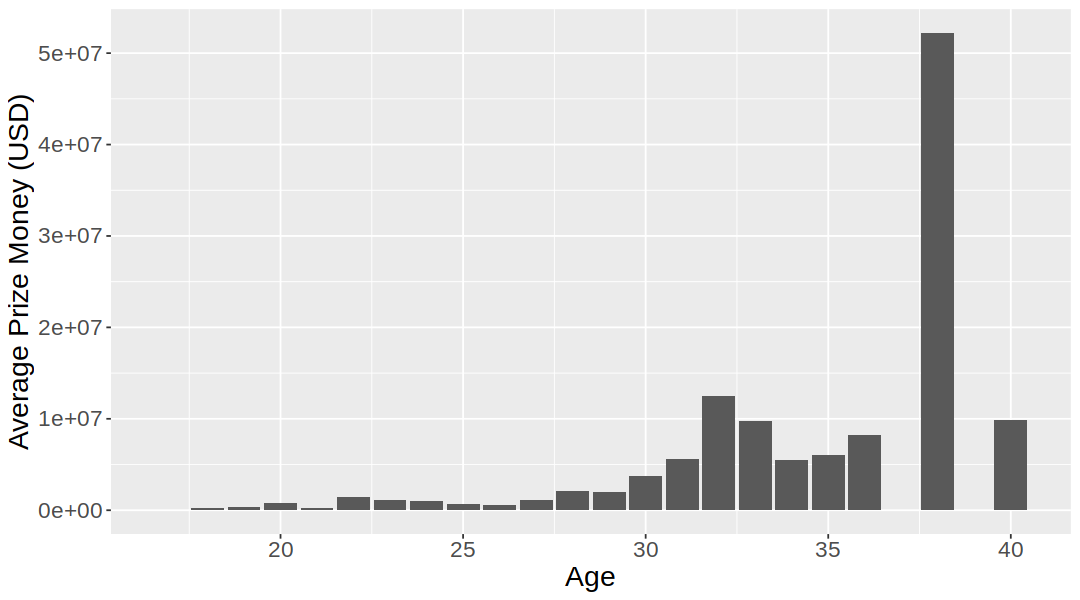

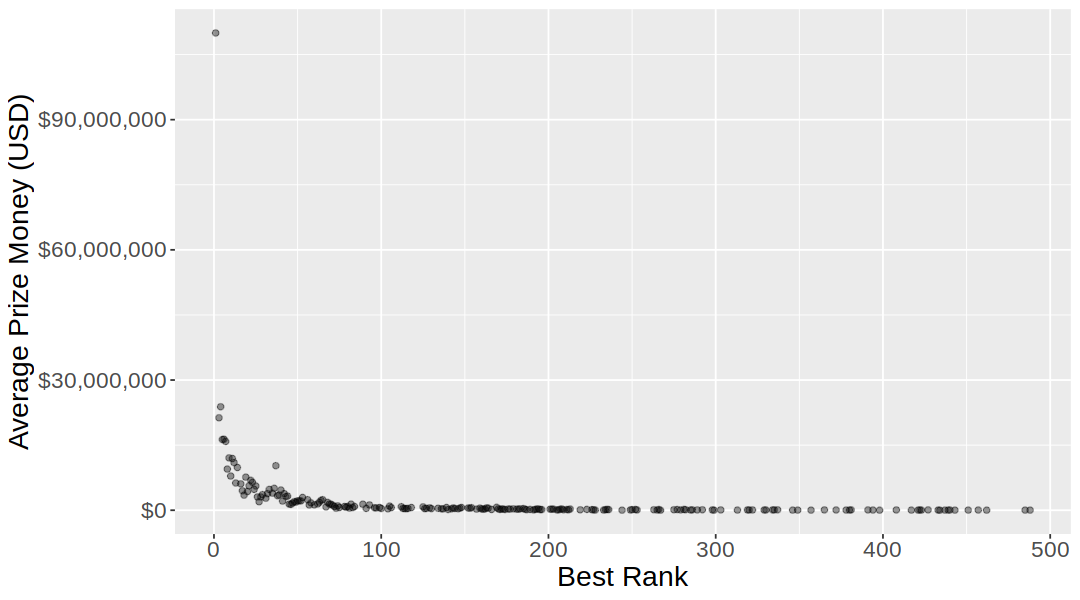

In [8]:
#Initial graphs of the predictor variables and the response variable we are predicting (Prize money)
options(repr.plot.width = 9, repr.plot.height = 5)

age_graph <- average_age |>
  ggplot(aes(x = age, y = average_prize_money)) +
    geom_histogram(stat = "identity") +
    labs(x = "Age", y = "Average Prize Money (USD)") +
    theme(text = element_text(size = 17))

best_rank_graph <- average_best_rank |>
  ggplot(aes(x = best_rank, y = average_prize_money)) +
    geom_point(alpha = 0.4) +
    labs(x = "Best Rank", y = "Average Prize Money (USD)") +
    scale_y_continuous(labels = dollar_format()) +
    theme(text = element_text(size = 17))

age_graph
best_rank_graph

**METHODS:**

Using the "prize_money" column as our numerical, response variable, we will use "age" and "best_rank" as our predictor factors to determine their impact and ability to predict a professional men's tennis player's total prize money accumulated. We decided on these predictor factors as we were able to see a relationship between age and best_rank and the total prize money of individuals. We cleaned the column names, such that they are usable within R. We also removed indicated date values from the age and best rank columns, in addition to any dollar signs or "US" values in the prize money column, all done to allow the numeric values easier to work with in our regression KNN analysis. 

**EXPECTED OUTCOMES & SIGNIFICANCE:**

***Expected Findings:***
Given the nature of rankings, which is done through winning games, we hypothesize that people with a higher best ranking implies that they won more tournaments. As a result, they should also earn more prize money from winning the tournament and sponsors. Moreover, those that are older should also have more prize money relative to those that are quite younger than them as they would have played in more tournaments, therefore having the opportunity to win more prize money.

***Finding Impacts:***
The findings from this analysis will provide insight into not only the longevity of a male professional tennis player's career (age), but also provide a comparable value for what an attainable amount of financial earnings is within the time frame of this career, based upon the best ranking one is able to achieve. Additionally, this regression model may be useful for talent identification for individuals scouting the upcoming male professional tennis players, as they can use the new observations of these athletes to predict their potential prize earnings. 

***Future Questions:***
* Do these findings align for the top 500 female professional tennis players?
* Does a players brand and marketability affect their prize earnings? Better yet, does one's best ranking affect their ability to receive marketing, and therefore, their total prize earnings?